In [1]:
#https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
from numpy import genfromtxt
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import numpy as np

<p>load the dataset <b><i></i></b></p>

In [2]:
data = genfromtxt('https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3b.csv', delimiter=',')

<p>calculatong the average of each column (feature) of the dataset and normalize each feature with it</p>

In [3]:
M = mean(data.T, axis=1)
data_normal = data - M

calculating the covariance matrix for the dataset

In [5]:
covariance = cov(data_normal.T)
print(f"The covariance matrix of the normalized data is the following:\n{covariance}")

The covariance matrix of the normalized data is the following:
[[ 7.89911157e-01  1.64350328e-02  5.03965534e-02 -1.39557561e+00
   4.51870543e+00  2.35123047e-01  3.56524806e-01 -2.92133512e-02
   9.15320632e-02  1.07205560e+00  3.92238044e-03  1.22678110e-01
   2.36909466e+02]
 [ 1.64350328e-02  7.74344335e-01  3.18039952e-02  4.24165474e-01
  -2.21434109e-01  1.44160704e-02  3.75581395e-02  5.34385808e-03
   6.47891175e-02 -1.54797734e-01 -6.06599761e-02  6.96007454e-02
  -3.33629219e+01]
 [ 5.03965534e-02  3.18039952e-02  8.83052117e-02  3.73006798e-01
   1.40136434e+00  4.12452594e-02  8.26573643e-02  5.81539654e-03
   1.24709839e-02  1.22397007e-01  2.06346094e-03  3.02871079e-02
   3.18556160e+01]
 [-1.39557561e+00  4.24165474e-01  3.73006798e-01  1.15631181e+01
  -6.46193798e+00 -4.24464222e-01 -4.52046512e-01  1.24282469e-01
  -1.77910614e-01 -2.39565069e+00 -2.05387955e-02 -1.02069171e-03
  -5.11872284e+02]
 [ 4.51870543e+00 -2.21434109e-01  1.40136434e+00 -6.46193798e+00
   

calculate the eigenvalues and eigenvectors of the dataset.

In [6]:
values, vectors = eig(covariance)
print(f"The eigenvalues of the normalized data are the following:\n{values}")

The eigenvalues of the normalized data are the following:
[1.24313073e+05 1.93456026e+02 9.50168321e+00 1.32500169e+00
 8.10595669e-01 4.51081713e-01 2.69157831e-01 1.60993380e-01
 1.11100343e-01 6.13399000e-03 2.19782528e-02 3.20312852e-02
 5.87421686e-02]


selecting the most important eigenvalues and adjust the dataset eigenvectors accordingly

In [7]:
new_values = values[0:3]
print(f"The most important eigenvalues are the following:\n{new_values}\n")
new_vectors = vectors[0:3]
print(f"The most important eigenvectors are the following:\n{new_vectors} ")


The most important eigenvalues are the following:
[1.24313073e+05 1.93456026e+02 9.50168321e+00]

The most important eigenvectors are the following:
[[-1.90615566e-03 -4.75319302e-04 -4.70065618e-02  2.25255930e-01
   9.82089183e-02 -2.20758056e-01 -8.52483156e-01 -3.65140031e-01
  -1.65925760e-01 -5.62139324e-03 -2.07811823e-02  2.48378617e-02
  -8.18675258e-04]
 [ 2.68379014e-04 -2.11118304e-03  3.21935310e-02  1.25115825e-01
   9.16405147e-01 -3.07909300e-01  1.86306127e-01  7.26209733e-02
  -1.81047372e-02 -1.16925805e-02  8.44468784e-02 -2.41209813e-02
   2.31770029e-02]
 [-2.56407459e-04 -4.21644285e-03  5.19948847e-02  4.67286333e-02
   2.01302236e-02 -3.45064791e-03 -1.57617050e-02  1.52544206e-01
  -7.18891029e-02 -1.38330530e-01 -6.68720003e-02  6.75337422e-01
  -6.97354965e-01]] 


applying the new eigenvectors to the old dataset
<br>the output will be reduced dataset 

In [8]:
new_data = new_vectors.dot(data_normal.T)

In [9]:
np.savetxt("foo.csv", new_data.T, delimiter=",")

In [11]:
from pickle import TRUE
print('The eigenvalues in descending order are:')
print(sorted(values, reverse = True))

The eigenvalues in descending order are:
[124313.0734445996, 193.45602626538698, 9.501683210059744, 1.32500168804488, 0.8105956686469433, 0.4510817126522543, 0.26915783148547645, 0.16099338038871672, 0.11110034340026119, 0.058742168552199936, 0.03203128519817115, 0.021978252812754253, 0.006133989998101165]


<h3><b><i>Logistic Regression</i></b></h3>


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/lab2/demo3a.csv", header=None)
#df = pd.read_csv("foo.csv")

In [15]:
# Separate the input features from the target variable
x = df.iloc[:,1:13].values
y = df.iloc[:,0].values
# Split the dataset into train and test set
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [16]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)

CPU times: total: 15.6 ms
Wall time: 113 ms


LogisticRegression(max_iter=1000)

In [17]:
# Get the predictions on the test set
prediction = classifier.predict(Xtest)

# Calculate the total number of errors on the test set
errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
1


In [18]:
#PCA 3 Features
foo = pd.read_csv("foo.csv", header=None)
foo.head()

,0,1,2
0,1.110593,30.776989,-190.908942
1,-2.046626,5.161373,-181.315593
2,-1.140539,10.155461,-275.513261
3,-0.923028,27.444470,-481.147170
4,2.030113,15.555477,38.879192


In [19]:
x = foo.iloc[:,0:3].values
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [20]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)

CPU times: total: 15.6 ms
Wall time: 10.2 ms


LogisticRegression(max_iter=1000)

In [21]:
prediction = classifier.predict(Xtest)

errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
1


In [22]:
#PCA 2 Features
x = foo.iloc[:,1:3].values
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [23]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)

CPU times: total: 0 ns
Wall time: 8.38 ms


LogisticRegression(max_iter=1000)

In [24]:
prediction = classifier.predict(Xtest)

errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
2


In [25]:
#PCA 1 Features
x = foo.iloc[:,2:3].values
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [26]:
%%time
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(Xtrain,Ytrain)

CPU times: total: 15.6 ms
Wall time: 10.2 ms


LogisticRegression(max_iter=1000)

In [27]:
prediction = classifier.predict(Xtest)

errors = 0
for index in range(0,len(prediction) - 1):
	if prediction[index] != Ytest[index]:
		errors += 1

print("Total errors on the test dataset")
print(errors)

Total errors on the test dataset
2


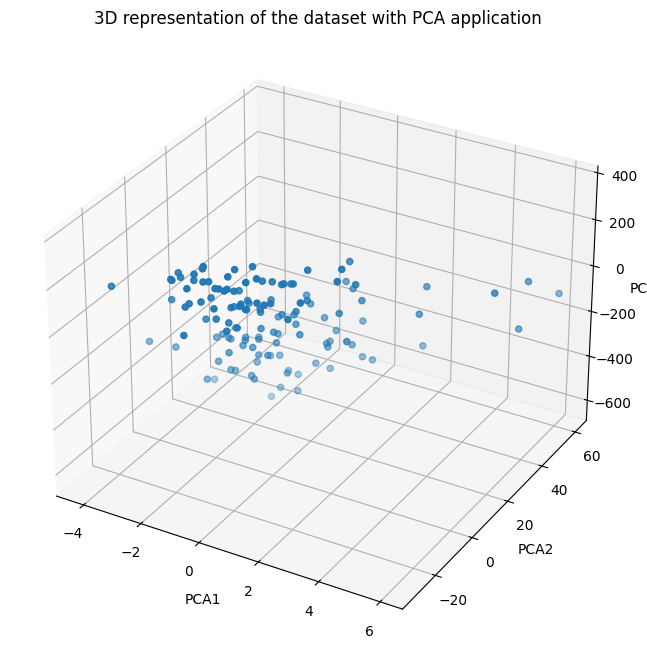

In [28]:
#foo dataset: PCA with 3 features - 3D representation

from mpl_toolkits import mplot3d
foo = pd.read_csv("foo.csv", header = None)
fig = plt.figure(figsize =(10, 8))
ax = plt.axes(projection ="3d")
ax.scatter3D(foo.iloc[:,0], foo.iloc[:,1], foo.iloc[:,2])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D representation of the dataset with PCA application')
plt.show()